In [1]:
import pandas as pd
import numpy as np
from time import time
import json
from sqlalchemy import create_engine
import re
import datetime
from mpl_toolkits.basemap import Basemap

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.style.use('seaborn-whitegrid')
import numpy as np
from mpl_toolkits.basemap import Basemap
from geopy.distance import distance as dist
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import folium

In [2]:
# Set up the SQL connection
dbname = 'redshift'
url = 'panamera-ods.cnsuxis6zqxr.us-west-2.redshift.amazonaws.com:5439/panameraods'
engine = create_engine("postgresql://" + 'lucasdresl' + ":" + 'cQsY801a76x82x62aWDT' + "@" + url)


- DUB / DAU by version

In [3]:
app_versions = ['13.23.03' , '13.25.004' , '13.25.005' , '13.25.006'] # the best comparison of all the app version without bundles i think it is 13.23.03...

In [4]:
query = """

drop table if exists app_version_with_bundles;
select
 params_v
 into temp table app_version_with_bundles
  from spectrum.hydra_p_olx_android
where params_resultset_type like '%BUNDLE%'
  and params_cc like '%za%'
   and year=2019
 and month in (9,10,11)
group by 1

;drop table if exists dau;
select
 year || '-' || month || '-' || day as date,
 count(distinct meta_session_long) as dau
  into temp table dau
    from spectrum.hydra_p_olx_android a
          join app_version_with_bundles b on a.params_v=b.params_v
 where ((params_en NOT IN ('app_open', 'on_create', 'apps', 'push_dis','pushDis', 'push_rcv', 'pushRcv', 'UAReg', 'ua_reg', 'uareg','push_dismissed', 'push_show', 'fetching_matrix', 'not_found','permissions_impression','userBadgeCount','test_assignment','test_impression','test_discovered','FCMReg','APNSReg','appOpn','appOpen','google_play_services','fetchTestDefinitionsError','messages_scheduler_ended','messages_scheduler_started','chat_auth_fail','item_chat_multi_delete') AND params_en IS NOT NULL AND params_en NOT LIKE 'b2c%'))
 and year=2019
 and month in (9,10,11)
 and params_cc like '%za%'
group by 1


;drop table if exists dub;
select
 year || '-' || month || '-' || day as date,
 count(distinct meta_session_long) as dub
  into temp table dub
    from spectrum.hydra_p_olx_android a
      join app_version_with_bundles b on a.params_v=b.params_v
where params_en in ('item_tap_call' , 'item_chat_tap_send_1st_reply' , 'item_tap_sms' , 'item_chat_tap_sms')
 and year=2019
 and month in (9,10,11)
 and params_cc like '%za%'
group by 1;

select
 a.*,
 b.dub
 from dau a
 left join dub b on a.date=b.date
order by date


"""

query2 = """

drop table if exists app_version_with_bundles;
select
 params_v
 into temp table app_version_with_bundles
  from spectrum.hydra_p_olx_android
where params_resultset_type like '%BUNDLE%'
  and params_cc like '%za%'
  and year=2019
  and month in (10,11)
group by 1

drop table if exists app_version_with_no_bundles;
select
 params_v
 into temp table app_version_with_no_bundles
  from spectrum.hydra_p_olx_android
where params_v not in (select params_v from app_version_with_bundles)
  and params_cc like '%za%'
  and year=2019
  and month in (10,11)
group by 1

;drop table if exists dau;
select
 year || '-' || month || '-' || day as date,
 count(distinct meta_session_long) as dau
  into temp table dau
    from spectrum.hydra_p_olx_android a
          join app_version_with_no_bundles b on a.params_v=b.params_v
 where ((params_en NOT IN ('app_open', 'on_create', 'apps', 'push_dis','pushDis', 'push_rcv', 'pushRcv', 'UAReg', 'ua_reg', 'uareg','push_dismissed', 'push_show', 'fetching_matrix', 'not_found','permissions_impression','userBadgeCount','test_assignment','test_impression','test_discovered','FCMReg','APNSReg','appOpn','appOpen','google_play_services','fetchTestDefinitionsError','messages_scheduler_ended','messages_scheduler_started','chat_auth_fail','item_chat_multi_delete') AND params_en IS NOT NULL AND params_en NOT LIKE 'b2c%'))
 and year=2019
 and month in (9,10,11)
 and params_cc like '%za%'
group by 1


;drop table if exists dub;
select
 year || '-' || month || '-' || day as date,
 count(distinct meta_session_long) as dub
  into temp table dub
    from spectrum.hydra_p_olx_android a
      join app_version_with_no_bundles b on a.params_v=b.params_v
where params_en in ('item_tap_call' , 'item_chat_tap_send_1st_reply' , 'item_tap_sms' , 'item_chat_tap_sms')
 and year=2019
 and month in (9,10,11)
 and params_cc like '%za%'
group by 1;

select
 a.*,
 b.dub
 from dau a
 left join dub b on a.date=b.date
order by date


"""



In [5]:
dub_b = pd.read_sql_query(query.replace('%', '%%'), engine)
dub_nob = pd.read_sql_query(query2.replace('%', '%%'), engine)

ProgrammingError: (psycopg2.errors.SyntaxError) syntax error at or near "drop"
LINE 14: drop table if exists app_version_with_no_bundles;
         ^

[SQL: 

drop table if exists app_version_with_bundles;
select
 params_v
 into temp table app_version_with_bundles
  from spectrum.hydra_p_olx_android
where params_resultset_type like '%%BUNDLE%%'
  and params_cc like '%%za%%'
  and year=2019
  and month in (10,11)
group by 1

drop table if exists app_version_with_no_bundles;
select
 params_v
 into temp table app_version_with_no_bundles
  from spectrum.hydra_p_olx_android
where params_v not in (select params_v from app_version_with_bundles)
  and params_cc like '%%za%%'
  and year=2019
  and month in (10,11)
group by 1

;drop table if exists dau;
select
 year || '-' || month || '-' || day as date,
 count(distinct meta_session_long) as dau
  into temp table dau
    from spectrum.hydra_p_olx_android a
          join app_version_with_no_bundles b on a.params_v=b.params_v
 where ((params_en NOT IN ('app_open', 'on_create', 'apps', 'push_dis','pushDis', 'push_rcv', 'pushRcv', 'UAReg', 'ua_reg', 'uareg','push_dismissed', 'push_show', 'fetching_matrix', 'not_found','permissions_impression','userBadgeCount','test_assignment','test_impression','test_discovered','FCMReg','APNSReg','appOpn','appOpen','google_play_services','fetchTestDefinitionsError','messages_scheduler_ended','messages_scheduler_started','chat_auth_fail','item_chat_multi_delete') AND params_en IS NOT NULL AND params_en NOT LIKE 'b2c%%'))
 and year=2019
 and month in (9,10,11)
 and params_cc like '%%za%%'
group by 1


;drop table if exists dub;
select
 year || '-' || month || '-' || day as date,
 count(distinct meta_session_long) as dub
  into temp table dub
    from spectrum.hydra_p_olx_android a
      join app_version_with_no_bundles b on a.params_v=b.params_v
where params_en in ('item_tap_call' , 'item_chat_tap_send_1st_reply' , 'item_tap_sms' , 'item_chat_tap_sms')
 and year=2019
 and month in (9,10,11)
 and params_cc like '%%za%%'
group by 1;

select
 a.*,
 b.dub
 from dau a
 left join dub b on a.date=b.date
order by date


]
(Background on this error at: http://sqlalche.me/e/f405)

In [61]:
dub_b['bundle'] = 1
dub_nob['bundle'] = 0
dub = dub_b.append(dub_nob).fillna(0)
dub['dub_over_dau'] = dub['dub'] / dub['dau']

In [62]:
dub['date'] = pd.to_datetime(dub['date'])

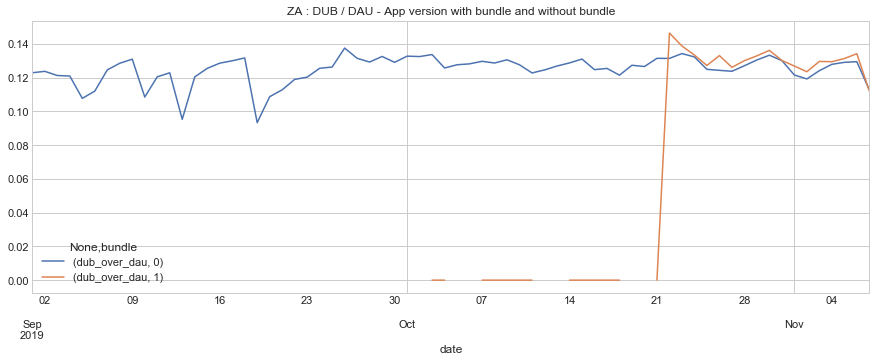

In [63]:
dub[['date' , 'dub_over_dau' , 'bundle']].set_index(['date' , 'bundle']).unstack().plot(figsize=(15,5) , 
                                                                                       title='ZA : DUB / DAU - App version with bundle and without bundle')

In [55]:
c = dub[['date' , 'dub_over_dau' , 'bundle']].set_index(['date' , 'bundle']).unstack().fillna(0)
c.to_csv('dub_dau')

- How many of the DAU are being affected by bundles ? (coverage)

In [5]:
query = """

drop table if exists app_version_with_bundles;
select
 params_v
 into temp table app_version_with_bundles
  from spectrum.hydra_p_olx_android
where params_resultset_type like '%BUNDLE%'
  and params_cc like '%za%'
group by 1

;drop table if exists dau;
select
 year || '-' || month || '-' || day as date,
 count(distinct meta_session_long) as dau
  into temp table dau
    from spectrum.hydra_p_olx_android a
      join app_version_with_bundles b on a.params_v=b.params_v
 where ((params_en NOT IN ('app_open', 'on_create', 'apps', 'push_dis','pushDis', 'push_rcv', 'pushRcv', 'UAReg', 'ua_reg', 'uareg','push_dismissed', 'push_show', 'fetching_matrix', 'not_found','permissions_impression','userBadgeCount','test_assignment','test_impression','test_discovered','FCMReg','APNSReg','appOpn','appOpen','google_play_services','fetchTestDefinitionsError','messages_scheduler_ended','messages_scheduler_started','chat_auth_fail','item_chat_multi_delete') AND params_en IS NOT NULL AND params_en NOT LIKE 'b2c%'))
 and year=2019
 and month in (10,11)
 and params_cc like '%za%'
group by 1

;drop table if exists users_with_bund;
select
 year || '-' || month || '-' || day as date,
 count(distinct meta_session_long) as user_with_bundle
  into temp table users_with_bund
    from spectrum.hydra_p_olx_android a
  join app_version_with_bundles b on a.params_v=b.params_v
 where params_resultset_type like '%BUNDLE%'
  and year=2019
 and month in (10,11)
 and params_cc like '%za%'
group by 1;

select
 a.*,
 b.user_with_bundle
    from dau a
 left join users_with_bund b on a.date=b.date
order by date

"""

In [6]:
cov = pd.read_sql_query(query.replace('%', '%%'), engine)

In [13]:
cov['date'] = pd.to_datetime(cov['date'])
cov = cov.sort_values('date')

In [15]:
cov['coverage'] = cov['user_with_bundle'] / cov['dau']

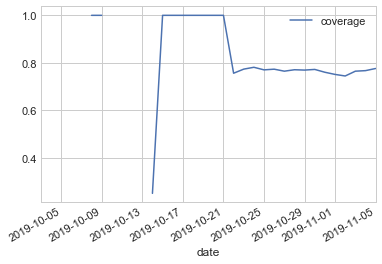

In [20]:
cov[['coverage']].set_index(cov['date']).plot()

- Which is the bundle more exposure in the home ? 
- Which one has the best conversion

In [ ]:
query = """

drop table if exists users_with_bundles;
select
 meta_session_long,
 params_user_id,
 params_resultset_id,
 CASE WHEN params_resultset_type like '%BUNDLE%' then 1 else 0 end as bundle,
 CASE WHEN params_resultset_type like '%BUNDLE_FAV%' then 1 else 0 end as bundle_fav,
 CASE WHEN params_resultset_type like '%BUNDLE_LAST%' then 1 else 0 end as bundle_search,
 CASE WHEN params_resultset_type like '%BUNDLE_NEARBY%' then 1 else 0 end as bundle_nearbyads
   into temp table users_with_bundles
  from spectrum.hydra_p_olx_android
where params_en = 'view_listings'
 and params_origin is null
 and year=2019
 and month=10
 and day = 27
 and params_cc like '%za%'
 and params_v like '%13.25.004%'
group by 1,2,3,4,5,6,7

;drop table if exists users_with_bundless;
select
 meta_session_long,
 params_user_id,
 params_resultset_id,
 max(bundle) as bundle,
 max(bundle_fav) as bundle_fav,
 max(bundle_search) as bundle_search,
 max(bundle_nearbyads) as bundle_nearbyads
  into temp table users_with_bundless
    from users_with_bundles a
group by 1,2,3

;drop table if exists users_with_bundlesss;
select
 a.*,
 bundle_fav + bundle_search + bundle_nearbyads as cantidad_de_bundles
 into temp table users_with_bundlesss
    from users_with_bundless a

;drop table if exists item_identification;
select
  a.params_resultset_id,
  params_item_id,
  CASE WHEN params_resultset_type like '%FAV%' then 1 else 0 end as adview_bundle_fav,
  CASE WHEN params_resultset_type like '%LAST%' then 1 else 0 end as adview_bundle_search,
  CASE WHEN params_resultset_type like '%NEARBY%' then 1 else 0 end as adview_bundle_nearbyads
    into temp table item_identification
 from spectrum.hydra_p_olx_android a
    join (select params_resultset_id from users_with_bundles group by 1) b on a.params_resultset_id=b.params_resultset_id
where params_en = 'view_item'
 and year=2019
 and month=10
 and day = 27

;drop table if exists users_with_bundles_adview;
select
a.*,
b.params_item_id,
case when b.params_item_id is not null then 1 else 0 end resultset_adview,
case when b.params_item_id is not null then b.adview_bundle_fav else 0 end as adview_bundle_fav,
case when b.params_item_id is not null then b.adview_bundle_search else 0 end as adview_bundle_search,
case when b.params_item_id is not null then b.adview_bundle_nearbyads else 0 end as adview_bundle_nearbyads
  into temp table users_with_bundles_adview
  from users_with_bundlesss a
 left join item_identification b on a.params_resultset_id=b.params_resultset_id

;drop table if exists resulset_id_performance;
select
  params_resultset_id,
  params_item_id,
  count(distinct case when params_en in ('item_chat_tap_send_1st_reply' ,'item_tap_sms' , 'item_chat_tap_sms') then params_item_id else null end) as chats,
  count(distinct case when params_en in ('item_tap_call') then params_item_id else null end) as calls
  into temp table resulset_id_performance
from spectrum.hydra_p_olx_android
where params_en in ('item_tap_call' , 'item_chat_tap_send_1st_reply' , 'item_tap_sms' , 'item_chat_tap_sms')
 and year=2019
 and month=10
 and day = 27
 and params_cc like '%za%'
group by 1,2

;drop table if exists final;
select
 a.*,
 case when b.params_resultset_id is not null then b.chats else 0 end as chats,
 case when b.params_resultset_id is not null then b.calls else 0 end as calls
  into temp table final
    from users_with_bundles_adview a
 left join resulset_id_performance b on a.params_resultset_id=b.params_resultset_id and a.params_item_id=b.params_item_id

;select * from final order by params_resultset_id 
group by 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15

"""

In [ ]:
df = pd.read_sql_query(query.replace('%', '%%'), engine)

In [ ]:
df.head()

In [ ]:
df[['meta_session_long' , 'params_user_id' , 'params_resultset_id' , 'params_item_id']].nunique()

From the people with bundles , which bundles are seing most ?

In [ ]:
df.pivot_table(index=['bundle_fav' , 'bundle_search' , 'bundle_nearbyads'] , values='params_resultset_id' , aggfunc=pd.Series.nunique).reset_index()

In [ ]:
print(8274 + 26 + 4508 + 2647 + 3930 + 1 +3063)

In [ ]:
df.groupby(['params_resultset_id' , 'params_item_id'])['params_item_id'].count().sort_values(ascending=False).head()

Performance

In [ ]:
df['reply'] = df['chats'] + df['calls']

In [ ]:
df.pivot_table(index=['adview_bundle_fav' , 'adview_bundle_search' , 'adview_bundle_nearbyads'] , 
               values=['params_resultset_id' , 'reply'] , 
               aggfunc={'params_resultset_id': pd.Series.nunique , 
                       'reply':'sum'}).reset_index()

In [ ]:
df.pivot_table(index=['bundle_fav' , 'bundle_search' , 'bundle_nearbyads',
                      'adview_bundle_fav' , 'adview_bundle_search' , 'adview_bundle_nearbyads'] , 
               values=['params_resultset_id' , 'reply'] , 
               aggfunc={'params_resultset_id': pd.Series.nunique , 
                       'reply':'sum'}).reset_index()